## Model to Detect Handwritten digit 0-9
### Importing the modules

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('data.csv')
print(dataset)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [3]:
x = dataset.drop(['class'],axis=1)
y = dataset['class']
print(x)
print(y)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995       0       0       0       0       0       0       0       0       0   
69996       0       0       0       0       0       0       0       0       0   
69997       0       0       0       0       0       0       0       0       0   
69998       0       0       0       0       0       0       0       0       0   
69999       0       0       0       0       0       0       0       0       0   

       pixel10  ...  pixel7

In [4]:
# Since we have image data the value of the pixel is in the rangle 0 - 255
# We normalize the data to the range 0 - 1 to improve accuracy of model
x = x/255
print(x)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [5]:
# We have taken 80% of the data as training data and 20% as testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

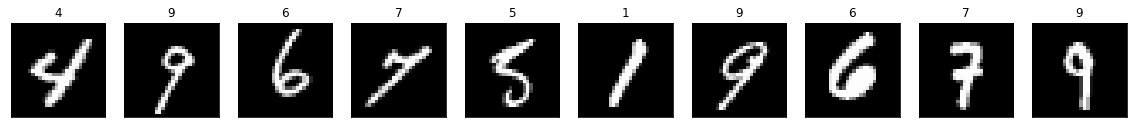

In [6]:
k = 10 #number of images to display
fig, axes = plt.subplots(ncols=k, sharex=False,sharey=True, figsize=(20, 8))
for i in range(k):
    axes[i].set_title(y_train.to_numpy()[i])
    axes[i].imshow(x_train.to_numpy()[i].reshape(28, 28), cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()


In [7]:
lr = LogisticRegression(tol=0.0001)
lr.fit(x_train, y_train)

LogisticRegression()

In [8]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [9]:
svm = SVC(kernel = 'poly',degree = 3)
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [11]:
y_pred = lr.predict(x_test)
y_pred_rf = rf.predict(x_test)
print(f'Accuracy of Logistic Regression model is {round(accuracy_score(y_test,y_pred)*100,2)}%')
print(f'Accuracy of Random Forest model is {round(accuracy_score(y_test,y_pred_rf)*100,2)}%')
print(f'Accuracy of Support Vector Machine is {round(svm.score(x_test,y_test)*100,2)}%')

Accuracy of Logistic Regression model is 91.91%
Accuracy of Random Forest model is 96.66%
Accuracy of Support Vector Machine is 97.43%
